# Desafio: Analisar Texto sobre Ciência de Dados

> *Neste notebook, vamos experimentar usar diferentes URLs - artigo da Wikipédia sobre Aprendizagem Automática. Pode-se notar que, ao contrário da Ciência de Dados, este artigo contém muitos termos, tornando a análise mais problemática. Precisamos encontrar outra forma de limpar os dados após realizar a extração de palavras-chave, para eliminar algumas combinações de palavras frequentes, mas pouco significativas.*

Neste exemplo, vamos fazer um exercício simples que cobre todos os passos de um processo tradicional de ciência de dados. Não é necessário escrever nenhum código, basta clicar nas células abaixo para executá-las e observar o resultado. Como desafio, é incentivado que experimente este código com dados diferentes.

## Objetivo

Nesta lição, discutimos diferentes conceitos relacionados à Ciência de Dados. Vamos tentar descobrir mais conceitos relacionados ao realizar **mineração de texto**. Começaremos com um texto sobre Ciência de Dados, extrairemos palavras-chave dele e, em seguida, tentaremos visualizar o resultado.

Como texto, utilizarei a página sobre Ciência de Dados da Wikipédia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Passo 1: Obter os Dados

O primeiro passo em qualquer processo de ciência de dados é obter os dados. Vamos utilizar a biblioteca `requests` para isso:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Passo 2: Transformar os Dados

O próximo passo é converter os dados para um formato adequado ao processamento. No nosso caso, descarregámos o código-fonte HTML da página e precisamos de o converter em texto simples.

Existem várias formas de fazer isto. Vamos utilizar o objeto [HTMLParser](https://docs.python.org/3/library/html.parser.html) incorporado mais simples do Python. Precisamos de criar uma subclasse da classe `HTMLParser` e definir o código que irá recolher todo o texto dentro das etiquetas HTML, exceto as etiquetas `<script>` e `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Passo 3: Obter Informações

O passo mais importante é transformar os nossos dados em algo a partir do qual possamos extrair informações úteis. No nosso caso, queremos extrair palavras-chave do texto e identificar quais são mais relevantes.

Vamos utilizar uma biblioteca Python chamada [RAKE](https://github.com/aneesha/RAKE) para a extração de palavras-chave. Primeiro, vamos instalar esta biblioteca caso ainda não esteja instalada:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


A funcionalidade principal está disponível a partir do objeto `Rake`, que podemos personalizar utilizando alguns parâmetros. No nosso caso, iremos definir o comprimento mínimo de uma palavra-chave para 5 caracteres, a frequência mínima de uma palavra-chave no documento para 3, e o número máximo de palavras numa palavra-chave para 2. Sinta-se à vontade para experimentar outros valores e observar o resultado.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Obtivemos uma lista de termos juntamente com o respetivo grau de importância. Como pode ver, as disciplinas mais relevantes, como machine learning e big data, estão presentes na lista nas posições de topo.

## Passo 4: Visualizar o Resultado

As pessoas conseguem interpretar melhor os dados quando apresentados de forma visual. Por isso, muitas vezes faz sentido visualizar os dados para extrair algumas perceções. Podemos utilizar a biblioteca `matplotlib` em Python para criar um gráfico simples da distribuição das palavras-chave com a sua relevância:


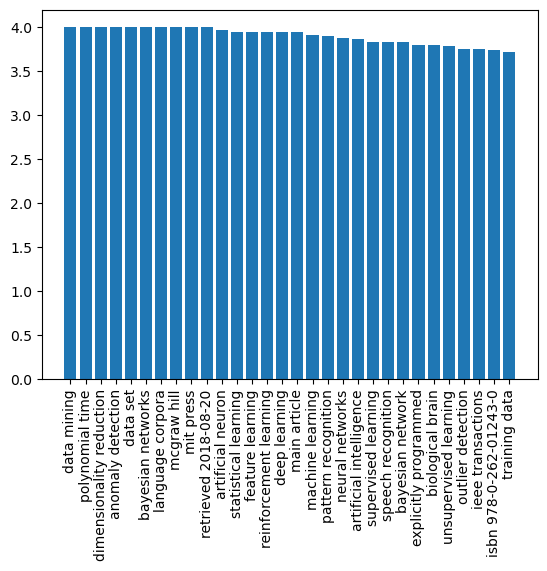

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Há, no entanto, uma forma ainda melhor de visualizar as frequências das palavras - utilizando **Word Cloud**. Precisaremos de instalar outra biblioteca para criar o word cloud a partir da nossa lista de palavras-chave.


In [71]:
!{sys.executable} -m pip install wordcloud

O objeto `WordCloud` é responsável por receber ou texto original, ou uma lista pré-computada de palavras com as suas frequências, e devolve uma imagem, que pode então ser exibida usando `matplotlib`:


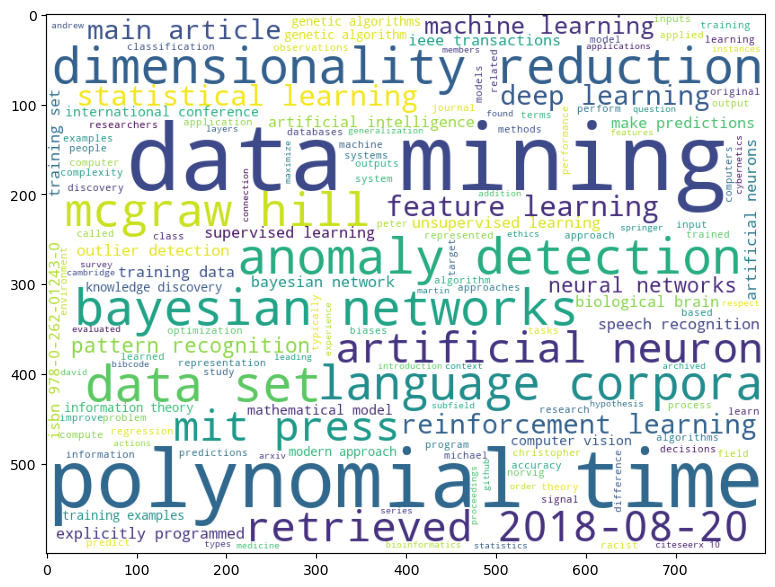

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Podemos também passar o texto original para `WordCloud` - vamos ver se conseguimos obter um resultado semelhante:


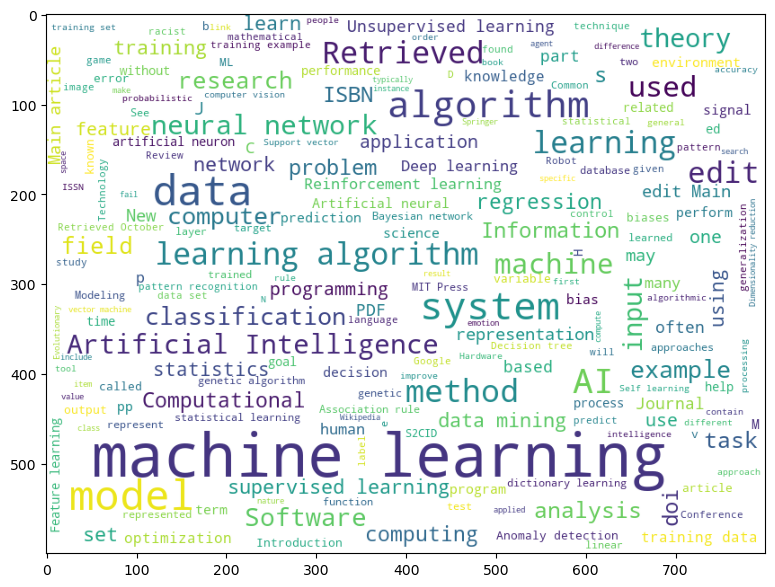

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Pode ver que a nuvem de palavras agora parece mais impressionante, mas também contém muito ruído (por exemplo, palavras não relacionadas como `Retrieved on`). Além disso, obtemos menos palavras-chave compostas por duas palavras, como *cientista de dados* ou *ciência da computação*. Isto deve-se ao facto de o algoritmo RAKE fazer um trabalho muito melhor na seleção de boas palavras-chave a partir do texto. Este exemplo ilustra a importância do pré-processamento e limpeza de dados, pois uma visão clara no final permitirá que tomemos decisões mais acertadas.

Neste exercício, percorremos um processo simples de extração de algum significado de um texto da Wikipédia, na forma de palavras-chave e nuvem de palavras. Este exemplo é bastante simples, mas demonstra bem todos os passos típicos que um cientista de dados segue ao trabalhar com dados, desde a aquisição até à visualização.

No nosso curso, discutiremos todos esses passos em detalhe.



---

**Aviso Legal**:  
Este documento foi traduzido utilizando o serviço de tradução automática [Co-op Translator](https://github.com/Azure/co-op-translator). Embora nos esforcemos para garantir a precisão, esteja ciente de que traduções automáticas podem conter erros ou imprecisões. O documento original no seu idioma nativo deve ser considerado a fonte oficial. Para informações críticas, recomenda-se uma tradução profissional realizada por humanos. Não nos responsabilizamos por quaisquer mal-entendidos ou interpretações incorretas resultantes do uso desta tradução.
